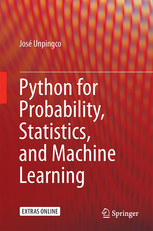

In [2]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

# Information Entropy

We are in a position to discuss information entropy.  This will give us a
powerful perspective on how information passes between experiments, and will
prove important in certain machine learning algorithms.

There used to be a TV game show where the host would hide a prize behind
one of three doors and the contestant would have to pick one of the doors.
However, before opening the door of the contestant's choice, the host
would open one of the other doors and ask the contestant if she wanted to
change her selection.  This is the classic *Monty Hall* problem. The
question is should the contestant stay with her original choice or switch
after seeing what the host has revealed?  From the information theory
perspective, does the information environment change when the host reveals
what is behind one of the doors?  The important detail here is that the
host *never* opens the door with the prize behind it, regardless of the
contestant's choice. That is, the host *knows* where the prize is, but he
does not reveal that information directly to the contestant. This is the
fundamental problem information theory addresses --- how to aggregate and
reason about partial information. We need a concept of information that
can accommodate this kind of question.

## Information Theory Concepts

The Shannon *information content* of an outcome $x$ is defined as,

$$
h(x) = \log_2\frac{1}{P(x)}
$$

 where $P(x)$ is the probability of $x$.  The *entropy* of the ensemble
$X$ is defined to be the Shannon information content of

$$
H(X) = \sum_x P(x) \log_2 \frac{1}{P(x)}
$$

 It is no accident that the entropy has this functional form
as the expectation of $h(x)$. It leads to a deep and powerful theory
of information. 

To get some intuition about what information entropy means, consider a sequence
of three-bit numbers where each individual bit is equally likely. Thus, the
individual information content of a single bit is $h(x) = \log_2 (2) = 1$. The
units of entropy are *bits* so this says that information content of a single bit
is one bit. Because the three-bit number has elements that are mutually
independent and equally likely, the information entropy of the
three-bit number is $h(X) = 2^3 \times  \log_2(2^3)/8=3 $. Thus,
the basic idea of information content at least makes sense at this level.

A better way to interpret this question is as how much information would I have
to provide in order to uniquely encode an arbitrary three-bit number? In this
case, you would have to answer three questions: *Is the first bit zero or one?
Is the second bit zero or one? Is the third bit zero or one?* Answering
these questions uniquely specifies the unknown three-bit number. Because the
bits are mutually independent, knowing the state of any of the bits does not
inform the remainder.

Next, let's consider a situation that lacks this mutual independence. Suppose
in a group of nine otherwise identical balls there is a heavier  one.
Furthermore, we also have a measuring scale that indicates whether one side is
heavier, lighter, or equal to the other.  How could we identify the heavier
ball? At the outset, the information content, which measures the uncertainty of
the situation is $\log_2(9)$ because one of the nine balls is heavier. [Figure](#fig:Information_Entropy_001) shows
one strategy. We could arbitrarily select out one of the balls (shown by the
square), leaving the remaining eight to be balanced. The thick, black
horizontal line indicates the scale.  The items below and above this line
indicate the counterbalanced sides of the scale.

<!-- dom:FIGURE: [fig-probability/NineBall_01.jpg, width=500 frac=0.75] One heavy ball is hidden among eight identical balls. By weighing groups sequentially, we can determine the heavy ball. <div id="fig:Information_Entropy_001"></div> -->
<!-- begin figure -->
<div id="fig:Information_Entropy_001"></div>

<p>One heavy ball is hidden among eight identical balls. By weighing groups sequentially, we can determine the heavy ball.</p>
<img src="fig-probability/NineBall_01.jpg" width=500>

<!-- end figure -->


If we get lucky, the scale will report that the group of four walls on either
side of the balance are equal in weight. This means that the ball that was
omitted is the heavier one. This is indicated by the hashed left-pointing
arrow. In this case, all the uncertainty has evaporated, and the *informational
value* of that one weighing is equal to $\log_2(9)$.  In other words, the scale
has reduced the uncertainty to zero (i.e., found the heavy ball). On the other
hand, the scale could report that the upper group of four balls is heavier
(black, upward-pointing arrow) or lighter (gray, downward-pointing arrow). In
this case, we cannot isolate the heavier ball until we perform all of the
indicated weighings, moving from left-to-right. Specifically, the four balls on
the heavier side have to be split by a subsequent weighing into two balls and
then to one ball before the heavy ball can be identified.  Thus, this process
takes three weighings. The first one has information content $\log_2(9/8)$, the
next has $\log_2(4)$, and the final one has $\log_2(2)$.  Adding all these up
sums to $\log_2(9)$. Thus, whether or not the heavier ball is isolated in the
first weighing, the strategy consumes $\log_2(9)$ bits, as it must, to find the
heavy ball.

<!-- dom:FIGURE: [fig-probability/NineBall_02.jpg, width=500 frac=0.75] For this strategy, the balls are broken up into three groups of equal size and subsequently weighed.  <div id="fig:Information_Entropy_002"></div> -->
<!-- begin figure -->
<div id="fig:Information_Entropy_002"></div>

<p>For this strategy, the balls are broken up into three groups of equal size and subsequently weighed.</p>
<img src="fig-probability/NineBall_02.jpg" width=500>

<!-- end figure -->


However, this is not the only strategy. [Figure](#fig:Information_Entropy_002)
shows another.  In this approach, the nine balls are split up into three groups
of three balls apiece. Two groups are weighed. If they are of equal weight,
then this means the heavier ball is in the group that was left out (dashed
arrow). Then, this group is split into two groups, with one element left out.
If the two balls on the scale weigh the same, then it means the excluded one is
the heavy one. Otherwise, it is one of the balls on the scale. The same process
follows if one of the initially weighed groups is heavier (black upward-facing
arrow) or lighter (gray lower-facing arrow). As before the information content
of the situation is $\log_2(9)$. The first weighing reduces the uncertainty of
the situation by $\log_2(3)$ and the subsequent weighing reduces it by another
$\log_2(3)$.  As before, these sum to $\log_2(9)$, but here we only need two
weighings whereas the first strategy in [Figure](#fig:Information_Entropy_001) takes
an average of $1/9 + 3*8/9 \approx 2.78$ weighings, which is more than two.

Why does the second strategy use fewer weighings?  To reduce weighings, we need
each weighing to adjudicate equally probable situations as many times as
possible. Choosing one of the nine balls at the outset (i.e, first strategy in
[Figure](#fig:Information_Entropy_001)) does not do this because the
probability of selecting the correct ball is $1/9$. This does not create a
equiprobable situation in the process. The second strategy leaves an equally
probable situation at every stage (see [Figure](#fig:Information_Entropy_002)), so it extracts the most information out of
each weighing as possible. Thus, the information content tells us how many bits
of information have to be resolved using *any* strategy (i.e., $\log_2(9)$ in
this example). It also illuminates how to efficiently remove uncertainty;
namely, by adjudicating equiprobable situations as many times as possible.  

## Properties of Information Entropy

Now that we have the flavor of the concepts, consider the following properties
of the information entropy,

$$
H(X) \ge 0
$$

 with equality if and only if $P(x)=1$ for  exactly one $x$.
Intuitively, this means that when just one of the items in the ensemble is
known absolutely (i.e., with $P(x)=1$), the uncertainty collapses to zero.
Also note that entropy is maximized when $P$ is uniformly distributed across
the elements of the ensemble. This is illustrated in [Figure](#fig:Information_Entropy_003) for the case of two outcomes. In other words,
information entropy is maximized when the two conflicting alternatives are
equally probable. This is the mathematical reason why using the scale in the
last example to adjudicate equally probable situations was so useful for
abbreviating the weighing process.

d:\Miniconda64\Lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in divide
d:\Miniconda64\Lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in multiply


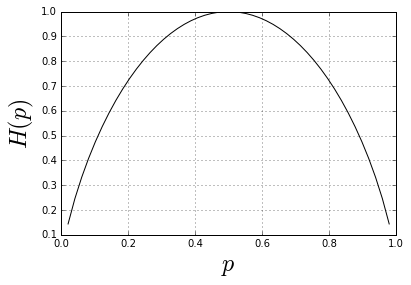

In [3]:
%matplotlib inline

from matplotlib.pylab import subplots
import numpy as np
p = np.linspace(0,1,50)
fig,ax=subplots()
#fig.set_size_inches((14,7))
_=ax.plot(p,p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)),'k-')
_=ax.set_xlabel('$p$',fontsize=24)
_=ax.set_ylabel('$H(p)$',fontsize=24)
_=ax.grid()
#fig.savefig('fig-probability/information_entropy_003.png')

<!-- dom:FIGURE: [fig-probability/information_entropy_003.png, width=500 frac=0.75] The information entropy is maximized when $p=1/2$.  <div id="fig:Information_Entropy_003"></div> -->
<!-- begin figure -->
<div id="fig:Information_Entropy_003"></div>

<p>The information entropy is maximized when $p=1/2$.</p>
<img src="fig-probability/information_entropy_003.png" width=500>

<!-- end figure -->


Most importantly, the concept of entropy extends jointly as follows,

$$
H(X,Y) = \sum_{x,y} P(x,y) \log_2 \frac{1}{P(x,y)}
$$

 If and only if $X$ and $Y$ are independent, entropy becomes
additive,

$$
H(X,Y) =  H(X)+H(Y)
$$

## Kullback-Leibler Divergence

Notions of information entropy lead to notions of distance between probability
distributions that will become important for machine learning methods.  The
Kullback-Leibler divergence between two probability distributions $P$ and $Q$
that are defined over the same set is defined as,

$$
D_{KL}(P,Q) = \sum_x P(x) \log_2 \frac{P(x)}{Q(x)}
$$

 Note that $D_{KL}(P,Q) \ge 0$ with equality if and only if $P=Q$.
Sometimes the Kullback-Leibler divergence is called the Kullback-Leibler
distance, but it is not formally a distance metric because it is asymmetrical
in $P$ and $Q$. The Kullback-Leibler divergence defines a relative entropy as
the loss of information if $P$ is modeled in terms of $Q$.  There is an
intuitive way to interpret the Kullback-Leibler divergence and understand its
lack of symmetry.  Suppose we have a set of messages to transmit, each with a
corresponding probability $\lbrace
(x_1,P(x_1)),(x_2,P(x_2)),\ldots,(x_n,P(x_n)) \rbrace$. Based on what we know
about information entropy, it makes sense to encode the length of the message
by $\log_2 \frac{1}{p(x)}$ bits. This parsimonious strategy means that more
frequent messages are encoded with fewer bits. Thus, we can rewrite the entropy
of the situation as before,

$$
H(X) = \sum_{k} P(x_k) \log_2 \frac{1}{P(x_k)}
$$

 Now, suppose we want to transmit the same set of messages, but with a
different set of probability weights,  $\lbrace
(x_1,Q(x_1)),(x_2,Q(x_2)),\ldots,(x_n,Q(x_n)) \rbrace$.  In this situation, we
can define the cross-entropy as

$$
H_q(X) = \sum_{k} P(x_k) \log_2 \frac{1}{Q(x_k)}
$$

 Note that only the purported length of the encoded message has
changed, not the probability of that message. The difference between these two
is the Kullback-Leibler divergence,

$$
D_{KL}(P,Q)=H_q(X)-H(X)=\sum_x P(x) \log_2 \frac{P(x)}{Q(x)}
$$

 In this light, the Kullback-Leibler divergence is the average
difference in the  encoded lengths of the same set of messages under two
different probability regimes. This should help explain the lack of symmetry of
the Kullback-Leibler divergence --- left to themselves, $P$ and $Q$ would
provide the optimal-length encodings separately, but there can be no necessary
symmetry in how each regime would rate the informational value of each message
($Q(x_i)$ versus $P(x_i)$). Given that each encoding is optimal-length in its
own regime means that it must therefore be at least sub-optimal in another,
thus giving rise to the Kullback-Leibler divergence. In the case where the
encoding length of all messages remains the same for the two regimes, then the
Kullback-Leibler divergence is zero [^Mackay].

[^Mackay]: The best, easy-to-understand presentation of this material is chapter
four of Mackay's text [[mackay2003information]](#mackay2003information). Another good reference is
chapter four of [[hastie2013elements]](#hastie2013elements).